In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 




sns.set()

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv', index_col ='ID')
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
df.shape

(129880, 23)

In [4]:
df.describe(include='all')

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
count,129880,129880.000000,129880,129880,129880,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880
unique,2,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,NaN,Returning,Business,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral or Dissatisfied
freq,65899,NaN,106100,89693,62160,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73452
mean,NaN,39.427957,NaN,NaN,NaN,1190.316392,14.713713,15.091129,3.057599,2.756876,...,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,NaN
std,NaN,15.119360,NaN,NaN,NaN,997.452477,38.071126,38.465650,1.526741,1.401740,...,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,NaN
min,NaN,7.000000,NaN,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,27.000000,NaN,NaN,NaN,414.000000,0.000000,0.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,NaN
50%,NaN,40.000000,NaN,NaN,NaN,844.000000,0.000000,0.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,NaN
75%,NaN,51.000000,NaN,NaN,NaN,1744.000000,12.000000,13.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [6]:
df.columns[8:22]

Index(['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

In [7]:
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied


In [8]:
df['Arrival Delay'].fillna(0,inplace=True)
df['Arrival Delay'].isnull().sum()

0

In [9]:
df['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [10]:
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

# EDA

* Which features are Customers most satisfied with?
* Comparing First-time customer satisfaction level to Returning customers satisfaction
* is Gender satisfaction equal?
* Which Age group were most satisfied with our service?


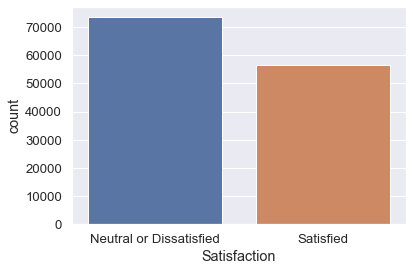

In [11]:
sns.set(font_scale = 1.2)
sns.countplot(data = df, x="Satisfaction")
plt.show()

# Which features are Customers most satisfied with?¶

In [12]:
df[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling',]].mean()


Departure and Arrival Time Convenience    3.057599
Ease of Online Booking                    2.756876
Check-in Service                          3.306267
Online Boarding                           3.252633
Gate Location                             2.976925
On-board Service                          3.383023
Seat Comfort                              3.441361
Leg Room Service                          3.350878
Cleanliness                               3.286326
Food and Drink                            3.204774
In-flight Service                         3.642193
In-flight Wifi Service                    2.728696
In-flight Entertainment                   3.358077
Baggage Handling                          3.632114
dtype: float64

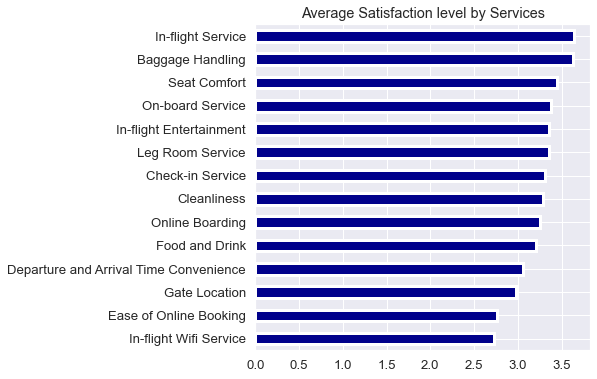

In [13]:
theme_params = {
    "palette": "pastel",
    "font_scale": 1.5,
    "color_codes": False
}
# set the theme with the custom parameters
sns.set_theme(**theme_params)
sns.set(font_scale = 1.2)
plt.figure(figsize=(6, 6))

df[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling',]].mean().sort_values().plot(kind='barh',linewidth=3,
                                                                    title='Average Satisfaction level by Services',
                                                                                  color = 'darkblue')

plt.show()

The service with the highest satisfactory level is the In-flight and Baggage Handling service.
Meanwhile, Majority of passenger satisfaction level is within the range 2 - 3.5, which could mean that customers are averagely 
satisfied with the Airline service, if not imporved it could cause a huge amount of decline.

# Comparing First-time customer satisfaction level to Returning customers 

In [14]:
# Customer type Value Counts
Customer_Type = pd.DataFrame(df['Customer Type'].value_counts())
Customer_Type

,Customer Type
Returning,106100
First-time,23780


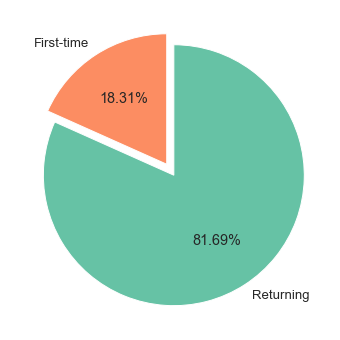

In [15]:
plt.figure(figsize=(6, 6))


plt.pie(Customer_Type['Customer Type'],labels = Customer_Type.index , autopct = '%1.2f%%',
       colors=sns.color_palette('Set2'),startangle =90,
       counterclock=False,explode=[0.05, 0.05])
plt.show()

Over 18% of customers are First-time customers. 
Let's check the satisfaction rate of both returning and first time customers 

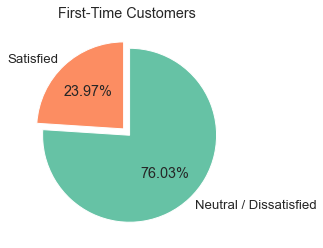

In [16]:
# store first time cutomer data in
First_time_Satisfaction = df[df["Customer Type"] == "First-time"].groupby("Satisfaction")["Customer Type"].value_counts()
# plot  a pie chart of first time customers satisfaction 
sns.set(font_scale = 1.2)
plt.figure(figsize=(6, 4))

plt.pie(First_time_Satisfaction,
       labels=["Neutral / Dissatisfied", "Satisfied"], 
       autopct = "%1.2f%%",
       colors=sns.color_palette('Set2'),startangle=90,
       counterclock=False,explode=[0.05, 0.05])
plt.title("First-Time Customers")

plt.show()


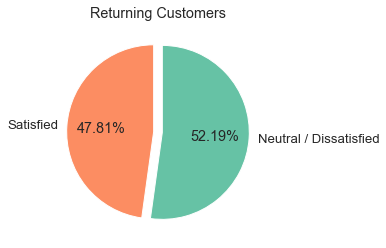

In [17]:
# store returning customer data into a dataframe 
Returning_Satisfaction = df[df["Customer Type"] == "Returning" ].groupby("Satisfaction")["Customer Type"].value_counts()

# plot  a pie chart of returning customers satisfaction 
# plot  a pie chart of first time customers satisfaction 


sns.set(font_scale = 1.2)
plt.figure(figsize=(6, 4))

plt.pie(Returning_Satisfaction,
       labels=["Neutral / Dissatisfied", "Satisfied"], 
       autopct = "%1.2f%%",
       colors=sns.color_palette('Set2'),startangle=90,
       counterclock=False,explode=[0.05, 0.05])
plt.title("Returning Customers")

plt.show()

47.81% of Returning Customers were satisfied while 23.97% of First-time Customers were Neutral or dissatisfied with the Overall Airline Service. 23.97% satisfaction is not impressive.

In [18]:
# create a dataframe that containes total number of Returning and First-time customers and 
# Total number of satisfaction
satisfied = df[df["Satisfaction"] == "Satisfied"]
Customer_type_satisfaction = pd.DataFrame(satisfied["Customer Type"].value_counts())
Customer_type_satisfaction["Total Observation"] = Customer_Type.values

Customer_type_satisfaction.rename(columns = {"Customer Type":"Satisfied"}, inplace=True)
Customer_type_satisfaction

,Satisfied,Total Observation
Returning,50728,106100
First-time,5700,23780


# Testing 

Let's test if there is a difference in proportion for satisfied Returning and First-time customers

# is Gender satisfaction equal?


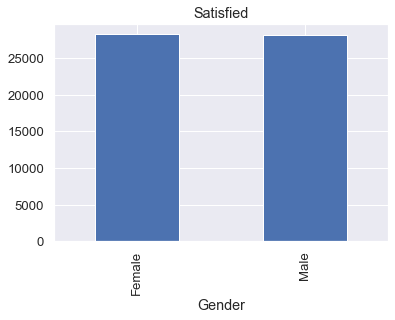

In [19]:
df[df["Satisfaction"] == "Satisfied"].groupby(["Gender"])["Satisfaction"].agg("count").plot(kind="bar", title="Satisfied")
plt.show()

Satisfaction level accross gender seems to be equal meaning both male and female seems to be satisfied
and happy with the Airline servies 

# Which features are Customers most satisfied with?

In [20]:
# creating a function to map 1-5 as poor , fair, good, very good, excellent

# def map_satisfaction(data):
#     cols = data.columns[8:22]
#     for i in cols:
#       data[i] = data[i].replace({0:'Terrible',1:'Poor', 2:'Fair', 3:'Good', 4:'Very Good', 5:'Excellent'})
#     return
        

In [21]:
# map_satisfaction(df)

In [22]:
df['Baggage Handling'].value_counts(normalize = True)

4    0.360032
5    0.260841
3    0.199038
2    0.110579
1    0.069510
Name: Baggage Handling, dtype: float64

After checking the descriptives of each features, Customers seems to be more satisfied with baggage handling. Over 60% of the customers indicated that the service was Exellent and very Good. In Addition majority of the customers were also satisfied with other services as they claim that it is very good, however many were not satisfied with the in-flight wifi service.

# Which Age group were most satisfied with our service? 

In [23]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [24]:
Below_30 = df.query("Age < 30")
above_30_below_60 = df.query("Age > 30 & Age < 60")
above_60 = df.query("Age > 60")

# def a function to plot 
def plot(data):
    cols = data.columns[8:22]
    for col in cols:
        bar_plot =  data.groupby("Age")["Satisfaction"].agg({col:"count"}).plot(kind="bar",color=sns.color_palette('Set2'))
    return bar_plot

<Figure size 432x432 with 0 Axes>

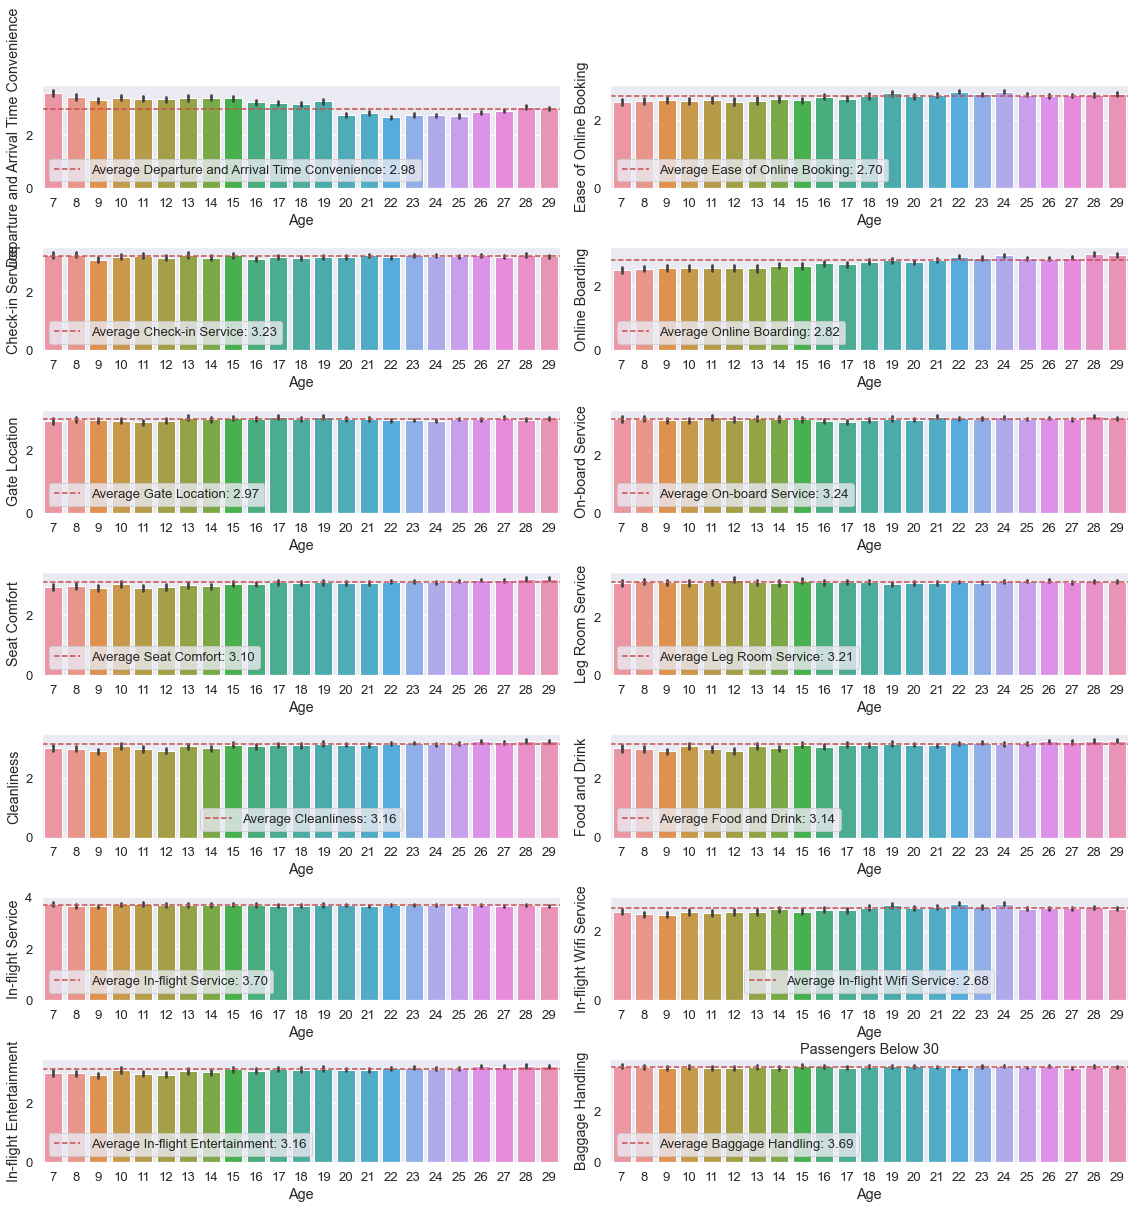

In [25]:
plt.figure(figsize=(6, 6))
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(16, 16))

# Adjust the height_ratios and width_ratios for larger plots
gs = GridSpec(7, 2, figure=fig, height_ratios=[3, 3, 3, 3, 3, 3, 3], width_ratios=[3, 3])

for i, column in enumerate(Below_30.columns[8:22]):
    ax = fig.add_subplot(gs[i // 2, i % 2])  # Fix the indexing here
    sns.barplot(x='Age', y=column, data=Below_30, ax=ax)
    
    # Calculate average value of the column
    avg_value = Below_30[column].mean()
    
    # Plot average value as a horizontal line
    ax.axhline(y=avg_value, color='r', linestyle='--', label=f'Average {column}: {avg_value:.2f}')
    

    
    ax.legend()

plt.tight_layout()
plt.title("Passengers Below 30")
plt.show()


<Figure size 432x432 with 0 Axes>

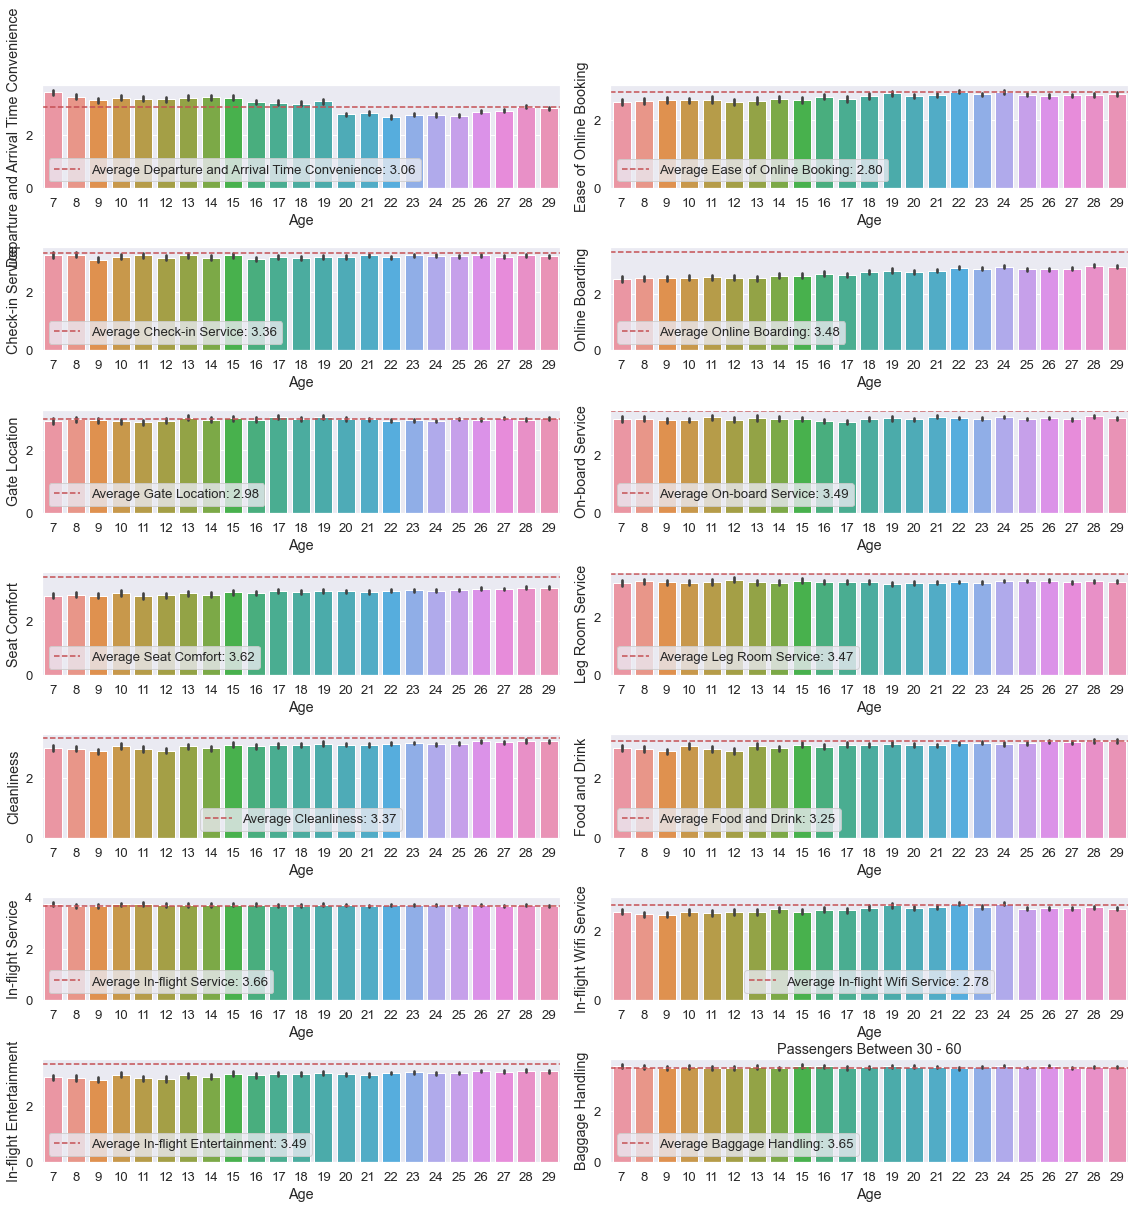

In [26]:
plt.figure(figsize=(6, 6))
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(16, 16))

# Adjust the height_ratios and width_ratios for larger plots
gs = GridSpec(7, 2, figure=fig, height_ratios=[3, 3, 3, 3, 3, 3, 3], width_ratios=[3, 3])

for i, column in enumerate(above_30_below_60.columns[8:22]):
    ax = fig.add_subplot(gs[i // 2, i % 2])  # Fix the indexing here
    sns.barplot(x='Age', y=column, data=Below_30, ax=ax)
    
    # Calculate average value of the column
    avg_value = above_30_below_60[column].mean()
    
    # Plot average value as a horizontal line
    ax.axhline(y=avg_value, color='r', linestyle='--', label=f'Average {column}: {avg_value:.2f}')
    

    
    ax.legend()

plt.tight_layout()
plt.title("Passengers Between 30 - 60")
plt.show()

<Figure size 432x432 with 0 Axes>

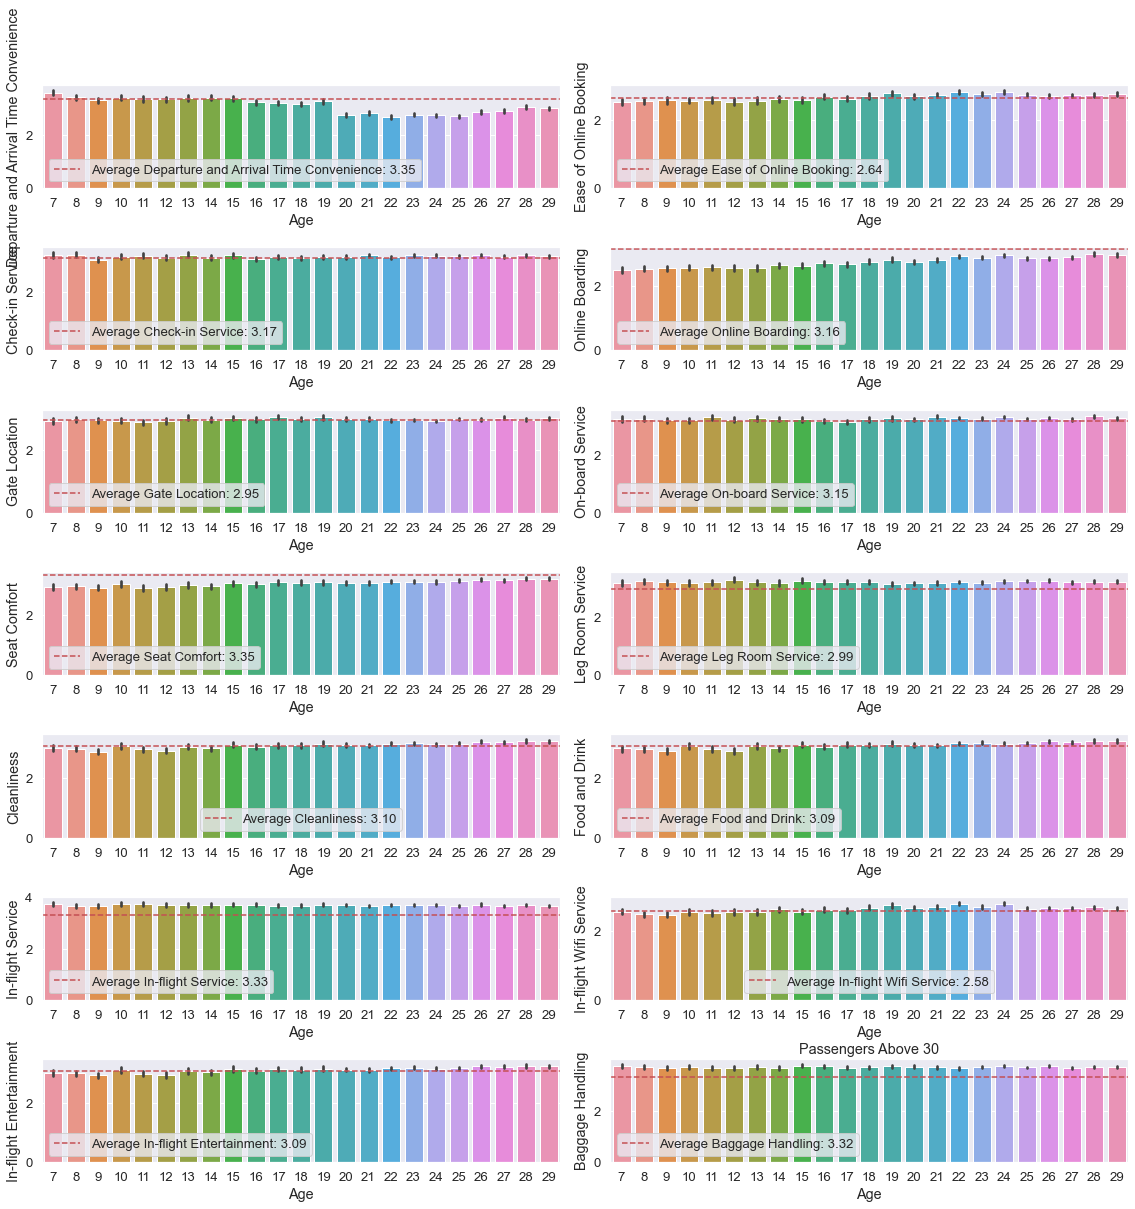

In [27]:
plt.figure(figsize=(6, 6))
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(16, 16))

# Adjust the height_ratios and width_ratios for larger plots
gs = GridSpec(7, 2, figure=fig, height_ratios=[3, 3, 3, 3, 3, 3, 3], width_ratios=[3, 3])

for i, column in enumerate(above_60.columns[8:22]):
    ax = fig.add_subplot(gs[i // 2, i % 2])  # Fix the indexing here
    sns.barplot(x='Age', y=column, data=Below_30, ax=ax)
    
    # Calculate average value of the column
    avg_value = above_60[column].mean()
    
    # Plot average value as a horizontal line
    ax.axhline(y=avg_value, color='r', linestyle='--', label=f'Average {column}: {avg_value:.2f}')
    

    
    ax.legend()

plt.tight_layout()
plt.title("Passengers Above 30")
plt.show()

plt.show()

Looking at the distribution of different Age group "customers below 30", "customers between 30 and 60" and "customers above 60", we discovered that across all age groups there was a consistent trend of low satisfaction with booking online, while the dissatisfaction was particularly pronounced among younger individuals below the age of 30 with the online boarding. Others seems evenly distributed across all age groups


# Summary and key findings 

Based on the analysis of passenger satisfaction data for various airline services, several key findings have emerged:

* In-flight and Baggage Handling Service: These services have the highest satisfactory level among passengers, indicating that they are particularly well-received. The majority of customers rated these services positively, suggesting they play a crucial role in overall satisfaction.


* Overall Satisfaction Level: The majority of passengers' satisfaction ratings fall within the range of 2 to 3.5, indicating that customers are averagely satisfied with the airline service. However, this also highlights the potential for improvement, as a substantial portion of customers may not be fully satisfied.


* Customer Segmentation: Over 18% of customers are identified as First-time customers. Comparing satisfaction rates between returning and first-time customers reveals that 47.81% of returning customers were satisfied, while 23.97% of first-time customers were neutral or dissatisfied. This suggests a need for targeted strategies to enhance satisfaction, particularly among first-time customers.


* Service-specific Satisfaction: Analyzing satisfaction levels for specific services reveals that customers are most satisfied with baggage handling, with over 60% rating it as excellent or very good. However, the in-flight WiFi service received lower satisfaction ratings, indicating an area for potential improvement.

# Conclusion

In conclusion, while certain services such as baggage handling receive high satisfaction ratings, there are opportunities for improvement to enhance overall customer satisfaction. Targeted efforts towards improving services with lower satisfaction ratings, particularly among first-time customers, can contribute to a more positive customer experience and ultimately drive customer loyalty and retention. Additionally, addressing specific pain points such as the in-flight WiFi service can further elevate overall satisfaction levels and differentiate the airline's service offering in the competitive market.